In [8]:
import pymssql
import pandas as pd
import geopandas
import numpy as np
from shapely.geometry import Point
conn = pymssql.connect(server="DWH03", user="TRAFIK\RWA",password="Ma041955",database="DW_DSA", port=1433) 

In [51]:
stmt ="""
SELECT 
[ReceivedDateTime]
      ,[Latitude]
      ,[Longitude]
      ,[VehicleId]
  FROM [DW_DSA].[integration].[RPS_PositionMessage_Short]
where ReceivedDateTime between '2018-10-01' and '2018-10-02'  
"""  

In [2]:
df = pd.read_sql(stmt,conn)


NameError: name 'stmt' is not defined

In [11]:
df.head()

NameError: name 'df' is not defined

In [41]:
stmt01 ="""
select
   
    [ReceivedDateTime]
   ,[Latitude]
   ,[Longitude]
   ,[VehicleId]
from
    [DW_EDW].[data].[RPS_PositionMessage]
where
    Speed <= 0.01
    and
        (
            ReceivedDateTime <= '2018-11-03'
            and ReceivedDateTime >= '2018-11-02'
        )
    and Latitude is not null
"""  

In [42]:
df01 = pd.read_sql(stmt01,conn)

In [19]:
df01.head()

,ReceivedDateTime,Latitude,Longitude,VehicleId
0,2018-11-02 00:00:00.000,55.868717,12.492103,0000
1,2018-11-02 00:00:00.000,55.844456,12.156114,1000
2,2018-11-02 00:00:00.000,55.737232,12.478281,1042
3,2018-11-02 00:00:00.000,55.639156,12.117576,1043
4,2018-11-02 00:00:00.000,55.716896,12.564925,1054


In [57]:
print ("The data shape: {0:10d}".format(df01.shape[0]) )

The data shape:   23128540


In [53]:
df01.columns[1:3]

Index(['Latitude', 'Longitude'], dtype='object')

In [60]:
df01.as_matrix(columns=df01.columns[1:3])

C:\Users\rwa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 55.86871719,  12.49210262],
       [ 55.84445572,  12.15611362],
       [ 55.73723221,  12.47828102],
       ..., 
       [ 55.86862946,  12.49213028],
       [ 56.44820404,   9.36180305],
       [ 55.86870956,  12.492136  ]])

In [72]:
df_2W = df01.head(20000)

In [73]:
df_2W.shape

(20000, 4)

### convert datafram 'Latitude', 'Longitude' to 2 dimension array

In [74]:
X = df_2W.as_matrix(columns=df_2W.columns[1:3])

C:\Users\rwa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [75]:
X

array([[ 55.86871719,  12.49210262],
       [ 55.84445572,  12.15611362],
       [ 55.73723221,  12.47828102],
       ..., 
       [ 55.68080902,  12.37927151],
       [ 55.68079758,  12.37905884],
       [ 55.68078995,  12.37894154]])

In [12]:
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))

In [13]:
df['Coordinates'] = df['Coordinates'].apply(Point)

In [14]:
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')

In [15]:
print(gdf.head())

          ReceivedDateTime   Latitude  Longitude  Speed VehicleId  \
0  2018-10-01 00:50:39.000  55.614025  12.494857   0.00      8430   
1  2018-10-01 00:50:39.000  55.694206  12.609467   0.00      8801   
2  2018-10-01 00:50:39.000  55.694275  12.609015   0.01      8803   
3  2018-10-01 00:50:39.000  55.694416  12.608177   0.00      8804   
4  2018-10-01 00:50:39.000  55.868595  12.492098   0.00      9921   

                                   Coordinates  
0   POINT (12.49485683441162 55.6140251159668)  
1  POINT (12.60946655273438 55.69420623779297)  
2   POINT (12.6090145111084 55.69427490234375)  
3  POINT (12.60817718505859 55.69441604614258)  
4  POINT (12.49209785461426 55.86859512329102)  


In [24]:
df01['geometry'] = list(zip(df01.Longitude, df01.Latitude))

In [27]:
(df01['geometry']) 

0       (12.49210262298584, 55.868717193603516)
1       (12.156113624572754, 55.84445571899414)
2       (12.478281021118164, 55.73723220825195)
3      (12.117575645446777, 55.639156341552734)
4      (12.564925193786621, 55.716896057128906)
5      (12.117655754089355, 55.639198303222656)
6       (12.478261947631836, 55.73740768432617)
7      (12.478229522705078, 55.737422943115234)
8        (12.53148365020752, 55.72016906738281)
9       (12.477714538574219, 55.73723220825195)
10     (12.585838317871094, 55.679195404052734)
11     (12.567923545837402, 55.731048583984375)
12       (12.42656135559082, 55.69541549682617)
13        (12.1175537109375, 55.63893508911133)
14       (11.339493751525879, 55.4161491394043)
15       (12.564448356628418, 55.7168083190918)
16      (12.564844131469727, 55.71643829345703)
17      (12.565264701843262, 55.71639633178711)
18       (12.47817325592041, 55.73749923706055)
19     (12.427793502807617, 55.695274353027344)
20      (12.117935180664062, 55.63874816

In [58]:
df['geometry'] = df['Latitude'].astype(str) + ', '  + df['Longitude'].astype(str)

In [95]:
df['geometry'] = np.asarray(df['geometry'])

In [99]:
np.asarray(df['geometry'])

array(['55.6140251159668, 12.494856834411621',
       '55.69420623779297, 12.609466552734375',
       '55.69427490234375, 12.609014511108398', ...,
       '55.65357208251953, 12.538511276245117',
       '55.6771125793457, 12.566650390625',
       '55.69490432739258, 12.509530067443848'], dtype=object)

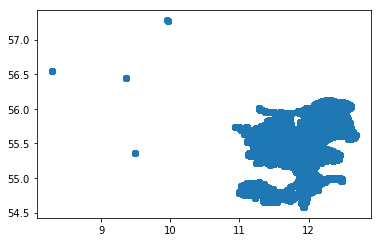

In [16]:
gdf.plot()

In [18]:
gdf['Coordinates']

0            POINT (12.49485683441162 55.6140251159668)
1           POINT (12.60946655273438 55.69420623779297)
2            POINT (12.6090145111084 55.69427490234375)
3           POINT (12.60817718505859 55.69441604614258)
4           POINT (12.49209785461426 55.86859512329102)
5           POINT (9.361700057983398 56.44822692871094)
6           POINT (12.15607452392578 55.84448623657227)
7           POINT (12.47864055633545 55.73735427856445)
8           POINT (12.52987480163574 55.72280883789063)
9            POINT (12.5675687789917 55.71652984619141)
10          POINT (12.56703758239746 55.71657180786133)
11          POINT (12.56711483001709 55.71659851074219)
12          POINT (11.33940315246582 55.41613388061523)
13          POINT (11.33935356140137 55.41611480712891)
14          POINT (11.33930206298828 55.41609191894531)
15          POINT (12.56632614135742 55.71663665771484)
16             POINT (12.56528568267822 55.71630859375)
17          POINT (12.56516361236572 55.71647262

In [76]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

In [ ]:
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)


# Number of samples per component
#n_samples = 500

# Generate random sample, two components
#np.random.seed(0)
#C = np.array([[0., -0.1], [1.7, .4]])
#X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

# Fit a Gaussian mixture with EM using five components
#gmm = mixture.GaussianMixture(n_components=16500, covariance_type='full').fit(X)
#plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
#             'Gaussian Mixture')

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=16500,
                                        covariance_type='full').fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')

plt.show()

In [22]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal as ps
import geopandas as gpd
from sklearn import cluster
from sklearn.preprocessing import scale

sns.set(style="whitegrid")

C:\Users\rwa\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [5]:
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3
google_maps = GoogleV3(client_id = 'gme-movia', secret_key = 'S_Xne8U96iWdKrOvVZi-iswdakE=')
#import geopy.geocoders 

C:\Users\rwa\AppData\Local\Continuum\anaconda3\lib\site-packages\geopy\geocoders\googlev3.py:122: UserWarning: Since July 2018 Google requires each request to have an API key. Pass a valid `api_key` to GoogleV3 geocoder to hide this warning. See https://developers.google.com/maps/documentation/geocoding/usage-and-billing
  UserWarning


In [7]:
%matplotlib inline
import os
import pandas_td as td

In [73]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(radius=1)
neigh.fit(df.drop(['geometry', 'ReceivedDateTime', 'Speed','VehicleId'], axis = 1).dropna())  

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1)

In [75]:
A = neigh.radius_neighbors_graph(df.drop(['geometry', 'ReceivedDateTime', 'Speed','VehicleId'], axis = 1).dropna())
A.toarray()

MemoryError: 

In [29]:
X = [[0], [3], [1]]
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(radius=3.5)
neigh.fit(X) 

A = neigh.radius_neighbors_graph(X, mode= 'distance')
A.toarray()

array([[ 0.,  3.,  1.],
       [ 3.,  0.,  2.],
       [ 1.,  2.,  0.]])

In [40]:
import numpy as np
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(radius=3.6)
neigh.fit(samples) 

rng = neigh.radius_neighbors([[1., 1., 1.]])
print(np.asarray(rng[0][0])) 

print(np.asarray(rng[1][0])) 
rng
samples

[ 1.73205081  1.5         0.5       ]
[0 1 2]


[[0.0, 0.0, 0.0], [0.0, 0.5, 0.0], [1.0, 1.0, 0.5]]